# 지역구 카테고리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [19]:
df = pd.read_csv('../data/preprocessed/22_subway_line.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_37056/2085909846.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/22_subway_line.csv')


In [20]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,공시지가 평균,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059000,기타,분당선
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059000,기타,분당선
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,6.858562e+06,88.4,30,1,48.262095,17.693929,1.243615,70.059000,기타,분당선
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322000,기타,분당선
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,7.322618e+06,118.0,31,1,46.647899,27.764117,2.459291,69.322000,기타,분당선
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,2.963517e+06,38.0,9,0,45.212818,12.462049,-0.641286,50.938744,기타,기타
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,2.963517e+06,38.0,9,0,45.212818,12.462049,-0.641286,50.938744,기타,기타
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,2.963517e+06,46.0,9,0,45.056635,13.703570,-0.607676,50.991003,기타,기타
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,2.963517e+06,41.4,9,0,44.744578,17.287617,-0.225827,51.082553,기타,기타


In [21]:
df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60이하)',
       'k-전용면적별세대현황(60~85이하)', 'k-85~135이하', 'k-135초과', 'k-홈페이지', 'k-등록일자',
       'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', 'is_test', '시군구 번지', '좌표X,좌표Y', '가장 가까운 거리', 'index',
       '역사_ID', '역사명', '호선', '위도', '경도', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리',
       '가장 가까운 버스 정류장 index', '가장 가까운 버스 정류장 노드 ID', '가장 가까운 버스 정류소번호',
       '가장 가까운 버스 정류소명', '가장 가까운 버스 정류소 타입', '가장 가까운 버스 정류장 X좌표',
       '가장 가까운 버스 정류장 Y좌표', '인근 버스 정류장 개수', '계약년', '계약월', 'GDP', '한국은행 기준금리',
       '기대 인플레이션', '지가지수', '아파트

In [22]:
df[['시', '구', '동']] = df['시군구'].str.split(' ', expand=True)
df.drop(['시'], axis=1, inplace=True)
df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60이하)',
       'k-전용면적별세대현황(60~85이하)', 'k-85~135이하', 'k-135초과', 'k-홈페이지', 'k-등록일자',
       'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', 'is_test', '시군구 번지', '좌표X,좌표Y', '가장 가까운 거리', 'index',
       '역사_ID', '역사명', '호선', '위도', '경도', '인근 지하철 역 개수', '가장 가까운 버스 정류장 거리',
       '가장 가까운 버스 정류장 index', '가장 가까운 버스 정류장 노드 ID', '가장 가까운 버스 정류소번호',
       '가장 가까운 버스 정류소명', '가장 가까운 버스 정류소 타입', '가장 가까운 버스 정류장 X좌표',
       '가장 가까운 버스 정류장 Y좌표', '인근 버스 정류장 개수', '계약년', '계약월', 'GDP', '한국은행 기준금리',
       '기대 인플레이션', '지가지수', '아파트

In [23]:
df[['구', '동']]

,구,동
0,강남구,개포동
1,강남구,개포동
2,강남구,개포동
3,강남구,개포동
4,강남구,개포동
...,...,...
1128089,중랑구,신내동
1128090,중랑구,신내동
1128091,중랑구,신내동
1128092,중랑구,신내동


In [24]:
categories = ['강남구', '서초구', '송파구', '용산구', '동작구', '성동구', '영등포구', '광진구', '마포구', '강동구', '종로구', '중구']

In [25]:
for category in categories:
    df[category] = df['구'].str.contains(category)

In [26]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,송파구,용산구,동작구,성동구,영등포구,광진구,마포구,강동구,종로구,중구
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,False,False,False,False,False,False,False,False,False,False
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,False,False,False,False,False,False,False,False,False,False
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,False,False,False,False,False,False,False,False,False,False
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,False,False,False,False,False,False,False,False,False,False
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# '기타' 카테고리 열 생성
df['기타'] = ~df[categories].any(axis=1)

In [28]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,용산구,동작구,성동구,영등포구,광진구,마포구,강동구,종로구,중구,기타
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,False,False,False,False,False,False,False,False,False,False
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,False,False,False,False,False,False,False,False,False,False
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,False,False,False,False,False,False,False,False,False,False
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,False,False,False,False,False,False,False,False,False,False
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# '카테고리' 열을 범주형으로 변환
df['구 카테고리'] = df[categories+['기타']].idxmax(axis=1)

In [30]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,동작구,성동구,영등포구,광진구,마포구,강동구,종로구,중구,기타,구 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,False,False,False,False,False,False,False,False,False,강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,False,False,False,False,False,False,False,False,False,강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,False,False,False,False,False,False,False,False,False,강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,False,False,False,False,False,False,False,False,False,강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,False,False,False,False,False,False,False,False,False,강남구


In [31]:
# 카테고리별 평균 실거래가 계산
category_mean_target = df.groupby('구 카테고리')['target'].mean().reset_index()
category_mean_target = category_mean_target.rename(columns={'target': '평균 실거래가'})

In [32]:
category_mean_target

,구 카테고리,평균 실거래가
0,강남구,114847.461503
1,강동구,54402.872801
2,광진구,67158.379293
3,기타,41222.353310
4,동작구,60936.451058
5,마포구,64445.226137
6,서초구,113608.653390
7,성동구,68924.389400
8,송파구,83868.032920
9,영등포구,56137.342464


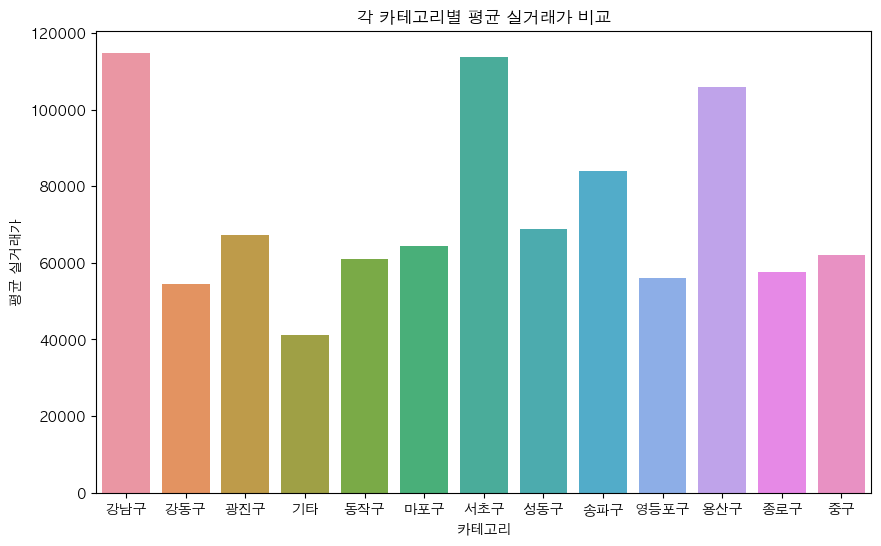

In [33]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='구 카테고리', y='평균 실거래가', data=category_mean_target)
plt.title('각 카테고리별 평균 실거래가 비교')
plt.xlabel('카테고리')
plt.ylabel('평균 실거래가')
plt.show()

In [35]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,동작구,성동구,영등포구,광진구,마포구,강동구,종로구,중구,기타,구 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,False,False,False,False,False,False,False,False,False,강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,False,False,False,False,False,False,False,False,False,강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,False,False,False,False,False,False,False,False,False,강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,False,False,False,False,False,False,False,False,False,강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,False,False,False,False,False,False,False,False,False,강남구


In [36]:
columns_to_drop = categories + ['기타']
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매수우위지수,건물나이,30년이상50년이하,구매력지수,거래활발지수,매매가격 지수 증감률,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리,구 카테고리
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선,강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선,강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,88.4,30,1,48.262095,17.693929,1.243615,70.059,기타,분당선,강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,분당선,강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,118.0,31,1,46.647899,27.764117,2.459291,69.322,기타,분당선,강남구


In [38]:
df.to_csv('../data/preprocessed/23_district_category.csv', index=False)